In [1]:
from pathlib import Path
import sys
import yaml

import geopandas as gpd
import matplotlib.pyplot as plt

DIR = Path('..')
sys.path.append(str(DIR))
from gtfo import Gtfo
from gtfo.busSim import BusSim, Config
from gtfo.busSim.manager import managerFactory

%matplotlib inline

In [2]:
def get_yelp_api_key():
    with open("../config.yml", 'r') as yml:
        cfg = yaml.safe_load(yml)
        return cfg["yelp"]["api_key"]

def plot_background():
    background_path = "../data/plot/background/"
    city = gpd.read_file(background_path + "madison-meter-shp")
    lakes = gpd.read_file(background_path + "water-meter-shp")
    street = gpd.read_file(background_path + "street-meter-shp")

    ax = city.plot(color="lightgray", alpha=.2, figsize=(12, 12), zorder=2)
    lakes.plot(color="lightblue", ax=ax, zorder=1, alpha=0.8)
    street.plot(color="darkgray", alpha = .5, ax=ax, zorder=3)
    return ax

In [3]:
gtfo = Gtfo("../data/mmt_gtfs.zip")
config = Config(day="monday", elapse_time="00:30:00", interval="10:00:00", max_walking_min=10)
config.set_starts(points=[(43.073691, -89.387407), (43.073691, -89.387407)])
result_gdf = gtfo.search(config)

services_gdf = gtfo.load_yelp(api_key=get_yelp_api_key())
gtfo.add_service_metrics(result_gdf, services_gdf)
# gtfo.add_job_metrics(result_gdf, census_gdf) # SLOW

50
100
150
50
100
150
200


geometry start_time          map_identifier  banks  \
0  POINT (43.073691 -89.387407)     0:0:00     search-result-0-0!0    0.0   
1  POINT (43.073691 -89.387407)     0:0:00     search-result-0-0!1    0.0   
2  POINT (43.073691 -89.387407)    10:0:00   search-result-0-600!0   36.0   
3  POINT (43.073691 -89.387407)    10:0:00   search-result-0-600!1   36.0   
4  POINT (43.073691 -89.387407)    20:0:00  search-result-0-1200!0   34.0   
5  POINT (43.073691 -89.387407)    20:0:00  search-result-0-1200!1   34.0   

   clinics  
0      0.0  
1      0.0  
2     62.0  
3     62.0  
4     63.0  
5     63.0

In [4]:
gtfo = Gtfo("../data/mmt_gtfs.zip")
config = Config(day="monday", elapse_time="00:30:00", interval="10:00:00", max_walking_min=10)
# config.set_starts(centroids=census_gdf)
config.set_starts(points=[(43.073691, -89.387407), (43.073691, -89.387407)])
result_gdf = gtfo.search(config)
result_gdf

geometry start_time          map_identifier
0  POINT (43.073691 -89.387407)     0:0:00     search-result-0-0!0
1  POINT (43.073691 -89.387407)     0:0:00     search-result-0-0!1
2  POINT (43.073691 -89.387407)    10:0:00   search-result-0-600!0
3  POINT (43.073691 -89.387407)    10:0:00   search-result-0-600!1
4  POINT (43.073691 -89.387407)    20:0:00  search-result-0-1200!0
5  POINT (43.073691 -89.387407)    20:0:00  search-result-0-1200!1

<AxesSubplot:>

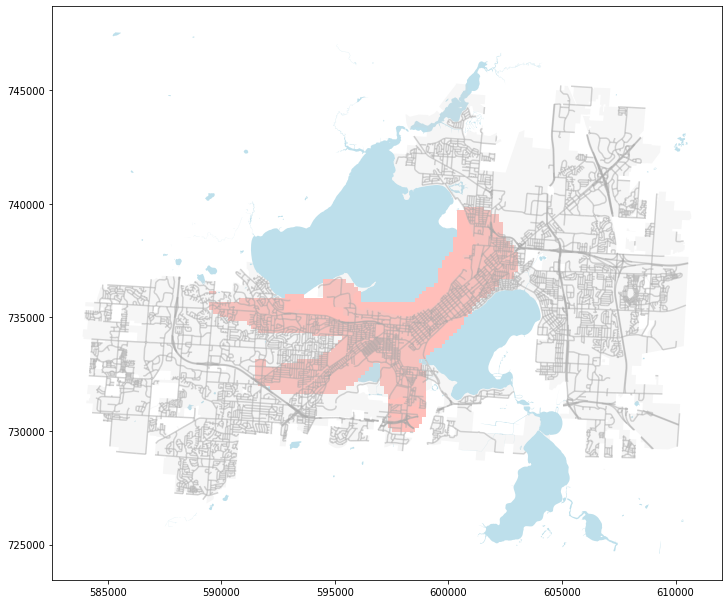

In [4]:
ax = plot_background()
example_gdf = gtfo.load_result_map(map_identifier="search-result-0-600!1")
example_gdf.plot(color="#ffbfba", ax=ax)

# Visualize each simulation

In [ ]:
GTFS_PATH = "./data/mmt_gtfs.zip"
CITY_PATH = "./data/plot/background/madison-meter-shp"
OUT_PATH = "/tmp"
DAY = "monday"
START_TIME = "12:00:00"
ELAPSE_TIME = "00:30:00"
AVG_WALKING_SPEED = 1.4 # 1.4 meters per second
MAX_WALKING_MIN = 10

In [ ]:
manager = managerFactory.create("local", gtfs_path=GTFS_PATH, city_path=CITY_PATH, out_path=OUT_PATH)
busSim = BusSim(manager, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN)
gdf = busSim.get_gdf(start_point=(43.073691, -89.387407))
# print(busSim.get_area(gdf)) #32092971.01932718 #32090055.215094768

gdf = gdf.to_crs(epsg=4326)
city = gpd.read_file("./data/plot/background/madison-shp")
lakes = gpd.read_file("./data/plot/background/water-shp")
street = gpd.read_file("./data/plot/background/street-shp")

ax = city.plot(color="lightgray", alpha=.2, figsize=(12, 12), zorder=2)
lakes.plot(color="lightblue", ax=ax, zorder=1, alpha=0.8)
street.plot(color="darkgray", alpha = .5, ax=ax, zorder=3)
gdf.difference(lakes.unary_union).plot(color="#ffbfba", ax=ax)
# gdf["geometry"].centroid.plot(color="red", ax=ax, markersize=2)

ax.set_axis_off()


In [ ]:
manager = managerFactory.create("local", gtfs_path=GTFS_PATH, city_path=CITY_PATH, out_path=OUT_PATH)
busSim = BusSim(manager, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN)
gdf = busSim.get_gdf(765)
# print(busSim.get_area(gdf)) #39671876.26227871

gdf = gdf.to_crs(epsg=4326)
city = gpd.read_file("./data/plot/background/madison-shp")
lakes = gpd.read_file("./data/plot/background/water-shp")
street = gpd.read_file("./data/plot/background/street-shp")

ax = city.plot(color="lightgray", alpha=.2, figsize=(12, 12), zorder=2)
lakes.plot(color="lightblue", ax=ax, zorder=1, alpha=0.8)
street.plot(color="darkgray", alpha = .5, ax=ax, zorder=3)
gdf.difference(lakes.unary_union).plot(color="#ffbfba", ax=ax)
# gdf["geometry"].centroid.plot(color="red", ax=ax, markersize=2)

ax.set_axis_off()

In [ ]:
from gtfo.busSim.manager import managerFactory
aws = managerFactory.create("aws", gtfs_path=None, city_path=None, out_path=None)

In [ ]:
aws.clean_up()

In [ ]:
import boto3
aws_lambda = boto3.client('lambda', region_name='ap-northeast-1')
with open("tmp.zip", 'rb') as f:
    response = aws_lambda.create_function(
        Code={
            'ZipFile': f.read()
        },
        Description='BusSim handler',
        FunctionName="test",
        Handler='lambda_function.lambda_handler',
        MemorySize=512,
        Publish=True,
        Role="arn:aws:iam::347664766527:role/s3rwRole",
        Runtime='python3.8',
        Timeout=900,
        TracingConfig={
            'Mode': 'Active',
        },
    )